In [13]:
from google.colab import files
uploaded = files.upload()  # upload training_set.zip and test_set.zip


Saving archive (2).zip to archive (2).zip


In [16]:
!unzip "archive (2).zip" -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/training_set/training_set/cats/cat.3704.jpg  
  inflating: /content/training_set/training_set/cats/cat.3705.jpg  
  inflating: /content/training_set/training_set/cats/cat.3706.jpg  
  inflating: /content/training_set/training_set/cats/cat.3707.jpg  
  inflating: /content/training_set/training_set/cats/cat.3708.jpg  
  inflating: /content/training_set/training_set/cats/cat.3709.jpg  
  inflating: /content/training_set/training_set/cats/cat.371.jpg  
  inflating: /content/training_set/training_set/cats/cat.3710.jpg  
  inflating: /content/training_set/training_set/cats/cat.3711.jpg  
  inflating: /content/training_set/training_set/cats/cat.3712.jpg  
  inflating: /content/training_set/training_set/cats/cat.3713.jpg  
  inflating: /content/training_set/training_set/cats/cat.3714.jpg  
  inflating: /content/training_set/training_set/cats/cat.3715.jpg  
  inflating: /content/training_set/training_set/cats/cat.3716.jpg 

In [18]:
!ls /content/


'archive (2).zip'   kaggle.json   sample_data   test_set   training_set


In [25]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ✅ Correct folder paths based on your structure
train_cat_dir = '/content/training_set/training_set/cats'
train_dog_dir = '/content/training_set/training_set/dogs'
test_cat_dir = '/content/test_set/test_set/cats'
test_dog_dir = '/content/test_set/test_set/dogs'

IMG_SIZE = 64  # Resize to 64x64 pixels

def load_images(folder, label):
    data = []
    for file in os.listdir(folder):
        try:
            img_path = os.path.join(folder, file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img.flatten()
            data.append((img, label))
        except Exception as e:
            print("Error loading:", file, "-", e)
    return data

# Load training images
train_data = load_images(train_cat_dir, 0) + load_images(train_dog_dir, 1)
np.random.shuffle(train_data)

X_train = np.array([item[0] for item in train_data])
y_train = np.array([item[1] for item in train_data])

# Load testing images
test_data = load_images(test_cat_dir, 0) + load_images(test_dog_dir, 1)
np.random.shuffle(test_data)

X_test = np.array([item[0] for item in test_data])
y_test = np.array([item[1] for item in test_data])

# Scale (normalize) the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Data loaded and preprocessed successfully!")
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Error loading: _DS_Store - OpenCV(4.12.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error loading: _DS_Store - OpenCV(4.12.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error loading: _DS_Store - OpenCV(4.12.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error loading: _DS_Store - OpenCV(4.12.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

✅ Data loaded and preprocessed successfully!
Training samples: 8005
Testing samples: 2023


In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create and train the SVM model
print("Training SVM model... this may take a few minutes ⏳")
svm_model = SVC(kernel='linear')  # You can also try 'rbf' later for better accuracy
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred = svm_model.predict(X_test)

# Evaluate model
acc = accuracy_score(y_test, y_pred)
print("\n✅ Model trained successfully!")
print(f"📊 Accuracy: {acc * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))


Training SVM model... this may take a few minutes ⏳

✅ Model trained successfully!
📊 Accuracy: 55.07%

Classification Report:
              precision    recall  f1-score   support

         Cat       0.55      0.58      0.56      1011
         Dog       0.55      0.52      0.54      1012

    accuracy                           0.55      2023
   macro avg       0.55      0.55      0.55      2023
weighted avg       0.55      0.55      0.55      2023



In [29]:
from google.colab import files
uploaded = files.upload()  # Upload a single image (jpg/png)


Saving download (1).jpg to download (1).jpg


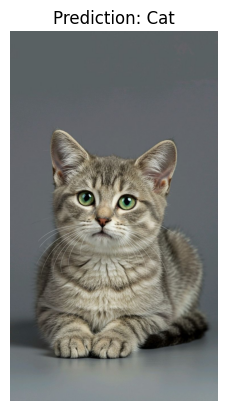

In [30]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Get the uploaded file name
for fn in uploaded.keys():
    test_img_path = fn

# Load the image
img = cv2.imread(test_img_path)
img_resized = cv2.resize(img, (64, 64)).flatten()
img_scaled = scaler.transform([img_resized])

# Predict
prediction = svm_model.predict(img_scaled)
label = 'Dog' if prediction[0] == 1 else 'Cat'

# Show image with prediction
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {label}")
plt.axis('off')
plt.show()


In [31]:
import joblib

# Save the trained SVM model
joblib.dump(svm_model, 'svm_cats_dogs_model.pkl')
print("✅ Model saved as 'svm_cats_dogs_model.pkl'")

# Optionally, save the scaler too (needed for preprocessing new images)
joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler saved as 'scaler.pkl'")


✅ Model saved as 'svm_cats_dogs_model.pkl'
✅ Scaler saved as 'scaler.pkl'
